<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Classification
**NIELIT ROPAR DEEMED TO BE UNIVERSITY**

---

## **K-Nearest Neighbors (KNN) – Definition**

**K-Nearest Neighbors (KNN)** is a **supervised machine learning algorithm** used for **classification and regression**.
It works by finding the *K closest data points* (neighbors) to a new input and then predicting the output based on those neighbors.

### **Key Idea**

> “Similar things exist close to each other.”

So, when a new data point arrives, KNN looks at the *K nearest labeled points* and assigns the class that is most common among them.

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

In [ ]:
# split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale Features using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

# Solve problem of overfitting/underfitting

In [ ]:
train_acc = {}
test_acc = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_acc[neighbor] = knn.score(X_train, y_train)
    test_acc[neighbor] = knn.score(X_test, y_test)

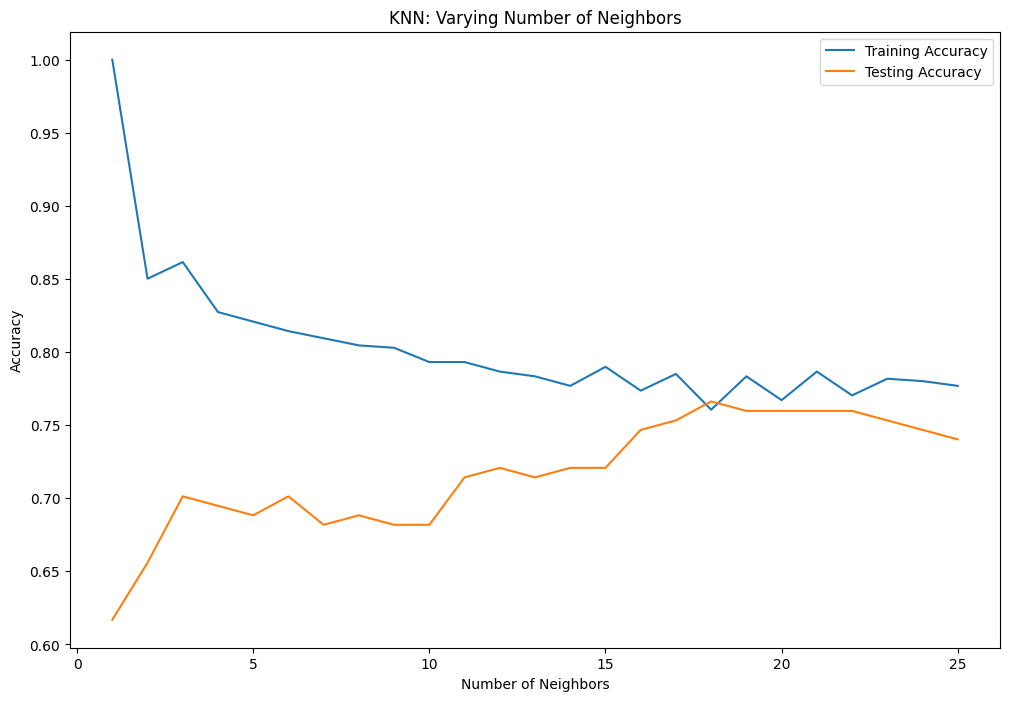

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_acc.values(), label="Training Accuracy")
plt.plot(neighbors, test_acc.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# Find Best K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []

# Try K values from 1 to 25
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Print all K vs accuracy
for k, acc in enumerate(accuracy_scores, start=1):
    print(f"K = {k}, Accuracy = {acc:.4f}")


K = 1, Accuracy = 0.6169
K = 2, Accuracy = 0.6558
K = 3, Accuracy = 0.7013
K = 4, Accuracy = 0.6948
K = 5, Accuracy = 0.6883
K = 6, Accuracy = 0.7013
K = 7, Accuracy = 0.6818
K = 8, Accuracy = 0.6883
K = 9, Accuracy = 0.6818
K = 10, Accuracy = 0.6818
K = 11, Accuracy = 0.7143
K = 12, Accuracy = 0.7208
K = 13, Accuracy = 0.7143
K = 14, Accuracy = 0.7208
K = 15, Accuracy = 0.7208
K = 16, Accuracy = 0.7468
K = 17, Accuracy = 0.7532
K = 18, Accuracy = 0.7662
K = 19, Accuracy = 0.7597
K = 20, Accuracy = 0.7597
K = 21, Accuracy = 0.7597
K = 22, Accuracy = 0.7597
K = 23, Accuracy = 0.7532
K = 24, Accuracy = 0.7468
K = 25, Accuracy = 0.7403


# Plot K vs Accuracy

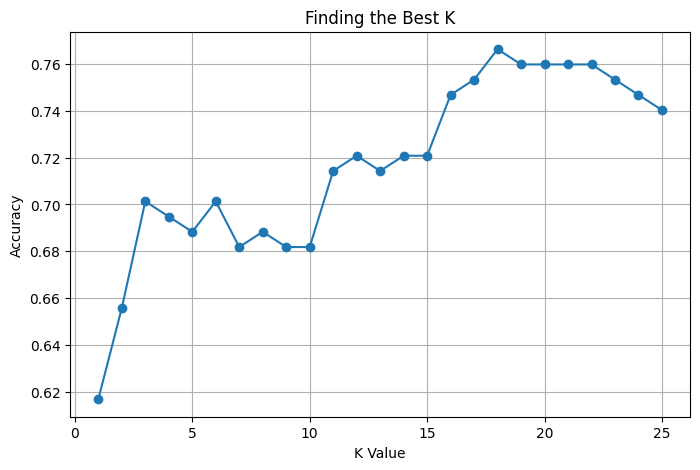

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 26), accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Finding the Best K')
plt.grid(True)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

## Evaluation Metrics

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[89 10]
 [26 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154

